In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [238]:
data= pd.read_csv('australia covid.csv')

In [279]:
data

Index(['Lat', 'Long', 'Confirmed', 'Deaths', 'Active', 'Recover'], dtype='object')

In [239]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Australian Capital Territory,Australia,-35.4735,149.0124,22-01-2020,0,0,0,0,Western Pacific
1,New South Wales,Australia,-33.8688,151.2093,22-01-2020,0,0,0,0,Western Pacific
2,Northern Territory,Australia,-12.4634,130.8456,22-01-2020,0,0,0,0,Western Pacific
3,Queensland,Australia,-28.0167,153.4000,22-01-2020,0,0,0,0,Western Pacific
4,South Australia,Australia,-34.9285,138.6007,22-01-2020,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
1107,Queensland,Australia,-28.0167,153.4000,08-06-2020,1062,6,1051,5,Western Pacific
1108,South Australia,Australia,-34.9285,138.6007,08-06-2020,440,4,436,0,Western Pacific
1109,Tasmania,Australia,-41.4545,145.9707,08-06-2020,228,13,209,6,Western Pacific
1110,Victoria,Australia,-37.8136,144.9631,08-06-2020,1687,19,1602,66,Western Pacific


In [240]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,1112.0,-31.996188,8.256493,-41.4545,-36.058525,-34.39865,-30.967050,-12.4634
Long,1112.0,141.232788,11.747471,115.8605,136.661925,145.46690,149.561625,153.4000
Confirmed,1112.0,449.603417,774.571530,0.0000,3.000000,71.00000,544.250000,3114.0000
Deaths,1112.0,5.300360,9.881370,0.0000,0.000000,0.00000,6.000000,48.0000
Recovered,1112.0,308.351619,603.117450,0.0000,0.000000,8.00000,372.000000,2729.0000
Active,1112.0,135.951439,380.037219,0.0000,0.000000,6.00000,75.000000,2868.0000


In [241]:
data.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [242]:
data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

### Creating a new column as Recover 

In [243]:
recover=[]
for i in data.Recovered:
    if i==0:
        recover.append(0)
    else:
        recover.append(1)
        

### In Recover column, 1 means recovered and 0 means not recovered

In [244]:
data['Recover']=recover

In [245]:
x=data['Recover'].value_counts()

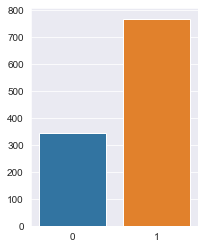

In [246]:
plt.figure(figsize=(3,4))
sns.barplot(data=data, x=x.index, y=x.values)
sns.set_style('darkgrid')
plt.show()

In [247]:
data.Recover.value_counts()

1    769
0    343
Name: Recover, dtype: int64

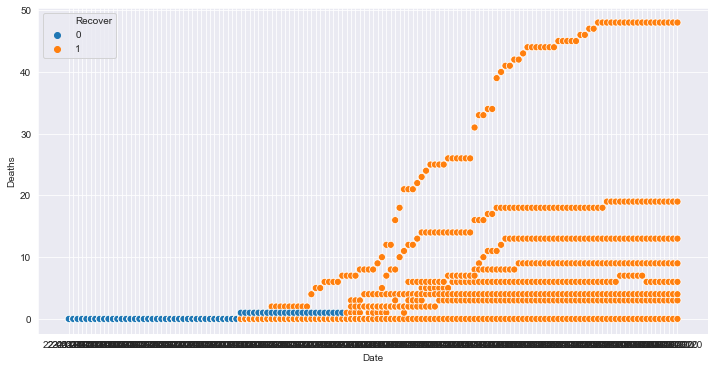

In [192]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='Date', y='Deaths', hue='Recover', s=50)


In [248]:
data.drop(columns=['Province/State','Country/Region','Recovered','WHO Region','Date'], inplace=True)

In [249]:
data.head()

,Lat,Long,Confirmed,Deaths,Active,Recover
0,-35.4735,149.0124,0,0,0,0
1,-33.8688,151.2093,0,0,0,0
2,-12.4634,130.8456,0,0,0,0
3,-28.0167,153.4000,0,0,0,0
4,-34.9285,138.6007,0,0,0,0


In [250]:
data.Recover.value_counts()

1    769
0    343
Name: Recover, dtype: int64

In [251]:
features=data.columns.difference(['Recover'])
features

Index(['Active', 'Confirmed', 'Deaths', 'Lat', 'Long'], dtype='object')

In [281]:
sc= StandardScaler()
data_model=sc.fit(data[features])
data_scaled=data_model.transform(data[features])
data_scaled=pd.DataFrame(data_scaled, columns=data[features].columns)
data_scaled

,Active,Confirmed,Deaths,Lat,Long
0,-0.357893,-0.580716,-0.536641,-0.421350,0.662535
1,-0.357893,-0.580716,-0.536641,-0.226907,0.849630
2,-0.357893,-0.580716,-0.536641,2.366813,-0.884604
3,-0.357893,-0.580716,-0.536641,0.482200,1.036196
4,-0.357893,-0.580716,-0.536641,-0.355312,-0.224156
...,...,...,...,...,...
1107,-0.344730,0.790982,0.070836,0.482200,1.036196
1108,-0.357893,-0.012404,-0.131656,-0.355312,-0.224156
1109,-0.342098,-0.286227,0.779558,-1.146076,0.403495
1110,-0.184148,1.598243,1.387035,-0.704903,0.317685


### Train Test Split

In [255]:
train_X, test_X, train_y, test_y = train_test_split( data_scaled,data['Recover'],
                                                  test_size = 0.3, random_state=123)

### KNN-Classifier

In [256]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(train_X, train_y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [257]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       101
           1       0.99      0.96      0.97       233

    accuracy                           0.96       334
   macro avg       0.95      0.97      0.96       334
weighted avg       0.97      0.96      0.96       334



### With tuning parameters using GridSearchCV

In [266]:
tuned_parameters = [{'n_neighbors': np.arange(3,9)}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=10,
                   scoring='accuracy')

In [268]:
knn_clf.fit(train_X, train_y )

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([3, 4, 5, 6, 7, 8])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [269]:
knn_clf.best_score_

0.9897102897102897

In [261]:
knn_clsf.best_params_

{'n_neighbors': 3}

In [270]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       101
           1       1.00      0.98      0.99       233

    accuracy                           0.98       334
   macro avg       0.97      0.98      0.98       334
weighted avg       0.98      0.98      0.98       334



In [275]:
knn_cm=metrics.confusion_matrix( test_y, knn_clf.predict( test_X ))
knn_cm

array([[100,   1],
       [  5, 228]], dtype=int64)

Text(0.5, 16.0, 'Predicted label')

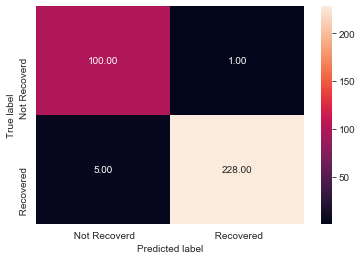

In [278]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = [" Not Recoverd", " Recovered"] , yticklabels = ["Not Recoverd", " Recovered"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [284]:
print('Accuracy score:',metrics.accuracy_score( test_y, knn_clf.predict( test_X ) ))

Accuracy score: 0.9820359281437125
